## Small Worlds: Board Rooms

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# First, let's create a random graph with 20 nodes.
# We can use fast_gnp_random_graph function in networkx which
# creates a Erdős-Rényi graph. 

test_graph1 = nx.fast_gnp_random_graph(20, 0.3, seed=11, directed=False)

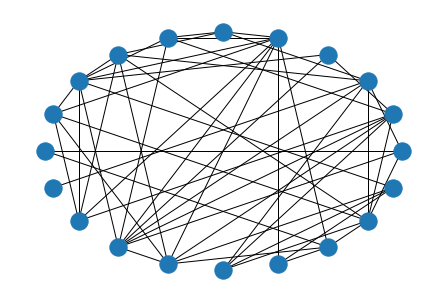

In [6]:
# We can visualize the graph with the circular layout.
nx.draw_circular(test_graph1)

In [7]:
# Then, we create a second graph with small world properties with 20 nodes.
# We can use fast_gnp_random_graph function to create a Watts–Strogatz
# small-world graph. 

test_graph2 = nx.watts_strogatz_graph(20, 6, 0.3, seed=17)

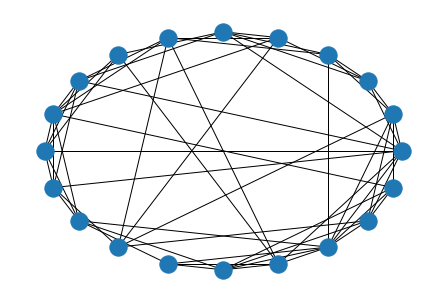

In [8]:
# We can visualize the graph using the circular layout.
nx.draw_circular(test_graph2)

In [9]:
# Finally another random graph to compare.
random_graph = nx.fast_gnp_random_graph(20, 0.3, seed=10, directed=False)

In [62]:
# To detect small-worldness we need to compare the clustering coefficients.

CC_test1 = nx.clustering(test_graph1)
CC_test2 = nx.clustering(test_graph2)
CC_random = nx.clustering(random_graph)

avg_CC_test1 = sum(CC_test1.values())/len(CC_test1)
avg_CC_test2 = sum(CC_test2.values())/len(CC_test2)
avg_CC_random = sum(CC_random.values())/len(CC_random)

# We also need the avarage shortest path length

avg_APL_test1 = nx.average_shortest_path_length(test_graph1)
avg_APL_test2 = nx.average_shortest_path_length(test_graph2)
avg_APL_random = nx.average_shortest_path_length(random_graph)


print(f"""
- Average Clustering Coefficient of:
  test graph 1: {avg_CC_test1}
  test graph 2: {avg_CC_test2}
  random graph: {avg_CC_random}
\n
- Average Shortest Path Length of:
  test graph 1: {avg_APL_test1}
  test graph 2: {avg_APL_test2}
  random graph: {avg_APL_random}
""")


- Average Clustering Coefficient of:
  test graph 1: 0.2711111111111111
  test graph 2: 0.3923809523809524
  random graph: 0.2240476190476191


- Average Shortest Path Length of:
  test graph 1: 1.9052631578947368
  test graph 2: 1.7789473684210526
  random graph: 1.8736842105263158



_Note_: we can add the description of a function, its input parameters, and return values in a docstring.

https://peps.python.org/pep-0257/


In [63]:
def calculate_small_world(test, random=None, random_nodes=None,
                          random_p=0.3, random_seed=None, random_directed=False):
    """
    Computes the small-worldliness of a graph compared to a random graph.

    Parameters:
    -----------
        test: (nx graph) The test graph
        
        random: (nx graph) Optional. The random graph to compare against. (Default: a random graph generated via `nx.fast_gnp_random_graph()`)

        random_nodes: (int) Optional. The random graph to compare against. (Default: the number of nodes in test graph).
        
        random_p: (float) Optional. The propability of connection in the generated random graph. (Default: 0.3).
        
        random_seed: (int) Optional. The seed for the generating function (Default: 11).
        
        random_directed: (bool) Optional. True if generated random graph is directed. (Default: false). 
    
    Returns:
    --------
        int: Small-worldliness of the graph compared to random graph
    """

    if random is None:
        if random_nodes is None:
            random_nodes = test.number_of_nodes()
        random = nx.fast_gnp_random_graph(random_nodes, random_p, random_seed, 
                                          random_directed)
    
    # Calculate avarage Clustering Coefficient
    CC_test = nx.clustering(test)
    CC_random = nx.clustering(random)
    
    avg_CC_test = sum(CC_test.values())/len(CC_test)
    avg_CC_random = sum(CC_random.values())/len(CC_random)
    
    # Calculate avarage shortest path length
    
    avg_APL_test = nx.average_shortest_path_length(test)
    avg_APL_random = nx.average_shortest_path_length(random)
    
    SW = (avg_CC_test/avg_CC_random) / (avg_APL_test/avg_APL_random)
    
    return SW

In [23]:
len(test_graph1.nodes())

20

In [29]:
calculate_small_world(test_graph1, random_graph)

1.1900039728904046

In [30]:
calculate_small_world(test_graph2, random_graph)

1.8445943821567132

In [64]:
calculate_small_world(test_graph2)

1.838448533714806

In [143]:
# Export graphs.

# nx.write_edgelist(test_graph1, "./test1.edgelist")
# nx.write_edgelist(test_graph2, "./test2.edgelist")

# nx.write_gml(test_graph1, "./test1.gml.gz")
# nx.write_gml(test_graph2, "./test2.gml.gz")

# test_data1 = nx.to_pandas_dataframe(test_graph1)
# test_data2 = nx.to_pandas_dataframe(test_graph2)
